## HDFCBANK stock price prediction using LSTM RNN model

In [1]:
import pandas_datareader.data as web

import pandas as pd

import datetime as dt

df = web.DataReader('HDFCBANK.NS', 'yahoo', start='2015-09-10', end='2022-07-01')

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-10,508.475006,498.149994,501.500000,505.500000,2231870.0,483.033752
2015-09-11,510.000000,503.399994,507.250000,505.250000,2150880.0,482.794800
2015-09-14,511.149994,501.750000,504.424988,509.850006,2530172.0,487.190369
2015-09-15,509.825012,504.049988,508.975006,506.575012,2166364.0,484.061005
2015-09-16,514.049988,505.774994,509.450012,511.674988,2127026.0,488.934296


In [2]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-20,1325.000000,1294.150024,1304.699951,1322.150024,7968420.0,1322.150024
2022-06-21,1354.000000,1324.050049,1336.900024,1336.550049,6610342.0,1336.550049
2022-06-22,1336.949951,1323.199951,1332.250000,1330.250000,4079849.0,1330.250000
2022-06-23,1348.000000,1318.500000,1330.500000,1335.150024,7686122.0,1335.150024
2022-06-24,1361.650024,1338.550049,1338.550049,1353.800049,4006716.0,1353.800049
2022-06-27,1376.000000,1352.000000,1370.000000,1356.250000,4902082.0,1356.250000
2022-06-28,1351.000000,1338.400024,1344.000000,1345.900024,4885287.0,1345.900024
2022-06-29,1350.750000,1331.250000,1331.250000,1343.949951,4997023.0,1343.949951
2022-06-30,1354.000000,1336.000000,1336.000000,1348.000000,6237911.0,1348.000000


In [3]:
df1 = df.reset_index()['Close']
df1.shape

(1679,)

In [4]:
df1.head()

0    505.500000
1    505.250000
2    509.850006
3    506.575012
4    511.674988
Name: Close, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

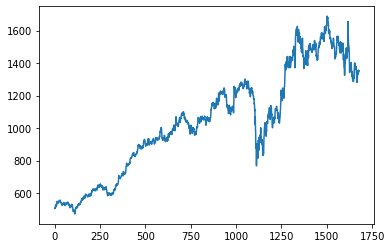

In [6]:
plt.plot(df1)
plt.show()

In [7]:
# LSTM is sensitive to scale of the data, so we transform the data using minmax scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1.shape

(1679, 1)

In [9]:
df1

array([[0.02807269],
       [0.02786733],
       [0.03164596],
       ...,
       [0.71680869],
       [0.72013556],
       [0.72485884]])

In [10]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [11]:
df.reset_index(inplace=True)
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [12]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-09-10,508.475006,498.149994,501.500000,505.500000,2231870.0,483.033752
1,2015-09-11,510.000000,503.399994,507.250000,505.250000,2150880.0,482.794800
2,2015-09-14,511.149994,501.750000,504.424988,509.850006,2530172.0,487.190369
3,2015-09-15,509.825012,504.049988,508.975006,506.575012,2166364.0,484.061005
4,2015-09-16,514.049988,505.774994,509.450012,511.674988,2127026.0,488.934296
...,...,...,...,...,...,...,...
1674,2022-06-27,1376.000000,1352.000000,1370.000000,1356.250000,4902082.0,1356.250000
1675,2022-06-28,1351.000000,1338.400024,1344.000000,1345.900024,4885287.0,1345.900024
1676,2022-06-29,1350.750000,1331.250000,1331.250000,1343.949951,4997023.0,1343.949951
1677,2022-06-30,1354.000000,1336.000000,1336.000000,1348.000000,6237911.0,1348.000000


In [13]:
training_size = int(len(df1)*0.7)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:, :]
train_data, test_data

(array([[0.02807269],
        [0.02786733],
        [0.03164596],
        ...,
        [0.46902151],
        [0.46097137],
        [0.45789097]]),
 array([[0.4806448 ],
        [0.4967451 ],
        [0.48836636],
        [0.50376835],
        [0.5077113 ],
        [0.49502   ],
        [0.51888286],
        [0.52064897],
        [0.52492042],
        [0.53691342],
        [0.52060786],
        [0.50019511],
        [0.48261628],
        [0.47793411],
        [0.48565567],
        [0.51514527],
        [0.54356716],
        [0.54808508],
        [0.53806345],
        [0.54139032],
        [0.53210802],
        [0.49957903],
        [0.50545234],
        [0.48733956],
        [0.47588051],
        [0.46121784],
        [0.43591746],
        [0.46848756],
        [0.45690528],
        [0.46770713],
        [0.47029468],
        [0.47588051],
        [0.48902355],
        [0.48660024],
        [0.48278063],
        [0.46257313],
        [0.46117673],
        [0.48068592],
        [0.488982

In [14]:
len(train_data), len(test_data)

(1175, 504)

In [15]:
train_data[0:4,:]

array([[0.02807269],
       [0.02786733],
       [0.03164596],
       [0.02895575]])

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
train_data[99:101]

array([[0.03425404],
       [0.0288736 ]])

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
y_train, X_train

(1075, 100)
(1075,)
(404, 100)
(404,)


(array([0.0288736 , 0.01340999, 0.01180819, ..., 0.46902151, 0.46097137,
        0.45789097]),
 array([[0.02807269, 0.02786733, 0.03164596, ..., 0.04624704, 0.03827907,
         0.03425404],
        [0.02786733, 0.03164596, 0.02895575, ..., 0.03827907, 0.03425404,
         0.0288736 ],
        [0.03164596, 0.02895575, 0.03314507, ..., 0.03425404, 0.0288736 ,
         0.01340999],
        ...,
        [0.63540405, 0.63515768, 0.60940546, ..., 0.45066231, 0.46166957,
         0.45789097],
        [0.63515768, 0.60940546, 0.61761986, ..., 0.46166957, 0.45789097,
         0.46902151],
        [0.60940546, 0.61761986, 0.62801109, ..., 0.45789097, 0.46902151,
         0.46097137]]))

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 4s 70ms/step - loss: 0.0270 - val_loss: 0.0398
Epoch 2/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0035 - val_loss: 0.0121
Epoch 3/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 4/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 5/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 6/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 7/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 8/100
17/17 [==============================] - 0s 18ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 9/100
17/17 [==============================] - 0s 19ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 10/100
17/17 [==============================] - 0s 18ms/step - loss: 9.9165e-04 - val_loss: 0.

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

935.0219433233974

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1480.268639553312

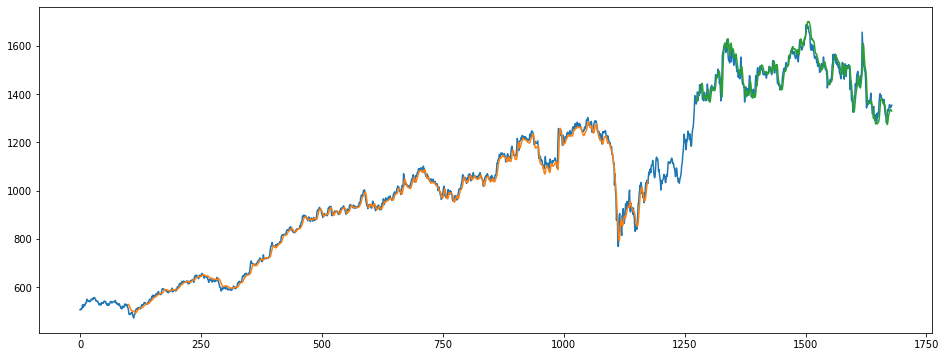

In [35]:
### Plotting 
plt.figure(figsize=(16,6))
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data), len(test_data[404:])

(504, 100)

In [38]:
x_input=test_data[404:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.8188315532884634,
 0.8136564436106823,
 0.8430229098124582,
 0.8656124991984397,
 0.8604785016107166,
 0.8233904829823273,
 0.8596160501800134,
 0.857932058861884,
 0.8503337424320538,
 0.8551391441194847,
 0.8631481803563326,
 0.8537837487016477,
 0.8457337006481322,
 0.7787863721042236,
 0.8089331658299772,
 0.78441321340569,
 0.7416983534758343,
 0.7390286747302182,
 0.7353321964670576,
 0.7010782046711257,
 0.7035425235132327,
 0.7391519107270017,
 0.7568538742454365,
 0.7602218568816952,
 0.797802719223828,
 0.7825649742741096,
 0.8024027610077495,
 0.8286067047501662,
 0.8339049501513403,
 0.8401889832533913,
 0.8279495129495815,
 0.7978848431305534,
 0.7882329276656341,
 0.7897936829869798,
 0.8054010356536581,
 0.8260601617279433,
 0.8206386803299857,
 0.849923022625036,
 0.9737961565309738,
 0.933915223160185,
 0.8867645692598587,
 0.8587534984759198,
 0.8570284953411229,
 0.8418318624814627,
 0.83965502744959,
 0.816202886359515,
 0.7591128331840347,
 0.7153711737366344,
 

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.706812]
101
1 day input [0.81365644 0.84302291 0.8656125  0.8604785  0.82339048 0.85961605
 0.85793206 0.85033374 0.85513914 0.86314818 0.85378375 0.8457337
 0.77878637 0.80893317 0.78441321 0.74169835 0.73902867 0.7353322
 0.7010782  0.70354252 0.73915191 0.75685387 0.76022186 0.79780272
 0.78256497 0.80240276 0.8286067  0.83390495 0.84018898 0.82794951
 0.79788484 0.78823293 0.78979368 0.80540104 0.82606016 0.82063868
 0.84992302 0.97379616 0.93391522 0.88676457 0.8587535  0.8570285
 0.84183186 0.83965503 0.81620289 0.75911283 0.71537117 0.72531067
 0.74178048 0.72637848 0.73471612 0.73989123 0.74030195 0.73931616
 0.75020023 0.76588971 0.72670708 0.72420165 0.69516378 0.69701202
 0.7144266  0.72062841 0.68321189 0.67360099 0.68489578 0.69220662
 0.69212449 0.67006886 0.69791558 0.68399222 0.6962727  0.70436396
 0.73549644 0.75632002 0.7641237  0.75377348 0.75861999 0.75061095
 0.7466681  0.74514836 0.73212856 0.73607151 0.74453228 0.72268201
 0.70255674 0.69056374 0.68682615 0.66

In [52]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
len(df1)

1679

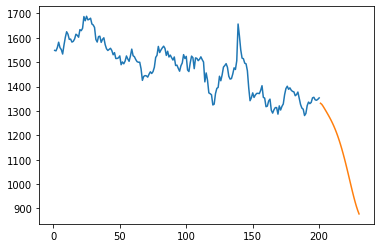

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1479:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

In [54]:
scaler.inverse_transform(lst_output)

array([[1331.78025693],
       [1327.10891194],
       [1319.09452731],
       [1310.10129209],
       [1300.89342083],
       [1291.55566502],
       [1281.98556825],
       [1272.04054775],
       [1261.56924086],
       [1250.42427579],
       [1238.47119662],
       [1225.59644508],
       [1211.70946479],
       [1196.74458786],
       [1180.66038184],
       [1163.4393595 ],
       [1145.08855926],
       [1125.6431733 ],
       [1105.17017562],
       [1083.775433  ],
       [1061.61081605],
       [1038.88218088],
       [1015.85350514],
       [ 992.84910113],
       [ 970.24704897],
       [ 948.46511979],
       [ 927.9362137 ],
       [ 909.07643292],
       [ 892.24890996],
       [ 877.72948624]])

## Let's see how different the data will be if we train the model on the entire dataset

In [55]:
training_size = len(df1)
train_data = df1[0:training_size, :]
train_data

array([[0.02807269],
       [0.02786733],
       [0.03164596],
       ...,
       [0.71680869],
       [0.72013556],
       [0.72485884]])

In [56]:
len(train_data)

1679

In [57]:
train_data[0:4,:]

array([[0.02807269],
       [0.02786733],
       [0.03164596],
       [0.02895575]])

In [58]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [59]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
print(X_train.shape), print(y_train.shape)
y_train, X_train

(1579, 100)
(1579,)


(array([0.0288736 , 0.01340999, 0.01180819, ..., 0.71680869, 0.72013556,
        0.72485884]),
 array([[0.02807269, 0.02786733, 0.03164596, ..., 0.04624704, 0.03827907,
         0.03425404],
        [0.02786733, 0.03164596, 0.02895575, ..., 0.03827907, 0.03425404,
         0.0288736 ],
        [0.03164596, 0.02895575, 0.03314507, ..., 0.03425404, 0.0288736 ,
         0.01340999],
        ...,
        [0.87062326, 0.85760346, 0.86470894, ..., 0.72489995, 0.72691244,
         0.71841056],
        [0.85760346, 0.86470894, 0.81883155, ..., 0.72691244, 0.71841056,
         0.71680869],
        [0.86470894, 0.81883155, 0.81365644, ..., 0.71841056, 0.71680869,
         0.72013556]]))

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

In [61]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
history2 = model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 4s 18ms/step - loss: 0.0557
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0047
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 4/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0016
Epoch 5/100
25/25 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 6/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 7/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 9/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 10/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 11/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 12/100
25/25 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 13/100
25/25 [=====

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)

In [66]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1114.3157246567512

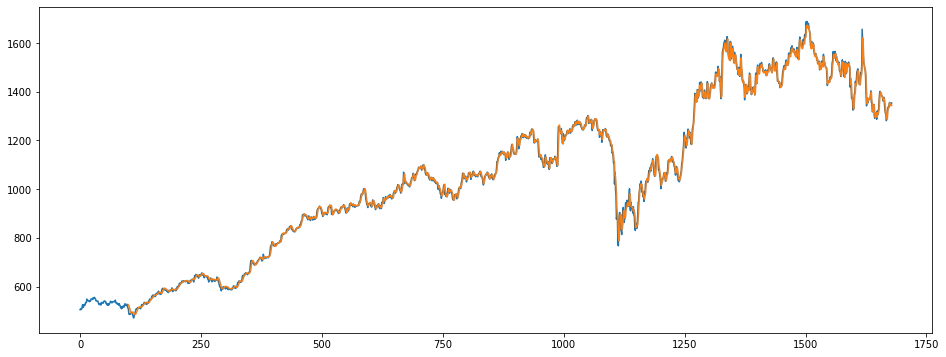

In [68]:
### Plotting 
plt.figure(figsize=(16,6))
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.show()

In [70]:
len(train_data), len(train_data[1579:])

(1679, 100)

In [74]:
x_input=train_data[1579:].reshape(1,-1)
x_input.shape

(1, 100)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [76]:
temp_input

[0.8188315532884634,
 0.8136564436106823,
 0.8430229098124582,
 0.8656124991984397,
 0.8604785016107166,
 0.8233904829823273,
 0.8596160501800134,
 0.857932058861884,
 0.8503337424320538,
 0.8551391441194847,
 0.8631481803563326,
 0.8537837487016477,
 0.8457337006481322,
 0.7787863721042236,
 0.8089331658299772,
 0.78441321340569,
 0.7416983534758343,
 0.7390286747302182,
 0.7353321964670576,
 0.7010782046711257,
 0.7035425235132327,
 0.7391519107270017,
 0.7568538742454365,
 0.7602218568816952,
 0.797802719223828,
 0.7825649742741096,
 0.8024027610077495,
 0.8286067047501662,
 0.8339049501513403,
 0.8401889832533913,
 0.8279495129495815,
 0.7978848431305534,
 0.7882329276656341,
 0.7897936829869798,
 0.8054010356536581,
 0.8260601617279433,
 0.8206386803299857,
 0.849923022625036,
 0.9737961565309738,
 0.933915223160185,
 0.8867645692598587,
 0.8587534984759198,
 0.8570284953411229,
 0.8418318624814627,
 0.83965502744959,
 0.816202886359515,
 0.7591128331840347,
 0.7153711737366344,
 

In [77]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.722105]
101
1 day input [0.81365644 0.84302291 0.8656125  0.8604785  0.82339048 0.85961605
 0.85793206 0.85033374 0.85513914 0.86314818 0.85378375 0.8457337
 0.77878637 0.80893317 0.78441321 0.74169835 0.73902867 0.7353322
 0.7010782  0.70354252 0.73915191 0.75685387 0.76022186 0.79780272
 0.78256497 0.80240276 0.8286067  0.83390495 0.84018898 0.82794951
 0.79788484 0.78823293 0.78979368 0.80540104 0.82606016 0.82063868
 0.84992302 0.97379616 0.93391522 0.88676457 0.8587535  0.8570285
 0.84183186 0.83965503 0.81620289 0.75911283 0.71537117 0.72531067
 0.74178048 0.72637848 0.73471612 0.73989123 0.74030195 0.73931616
 0.75020023 0.76588971 0.72670708 0.72420165 0.69516378 0.69701202
 0.7144266  0.72062841 0.68321189 0.67360099 0.68489578 0.69220662
 0.69212449 0.67006886 0.69791558 0.68399222 0.6962727  0.70436396
 0.73549644 0.75632002 0.7641237  0.75377348 0.75861999 0.75061095
 0.7466681  0.74514836 0.73212856 0.73607151 0.74453228 0.72268201
 0.70255674 0.69056374 0.68682615 0.66

In [78]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
len(df1)

1679

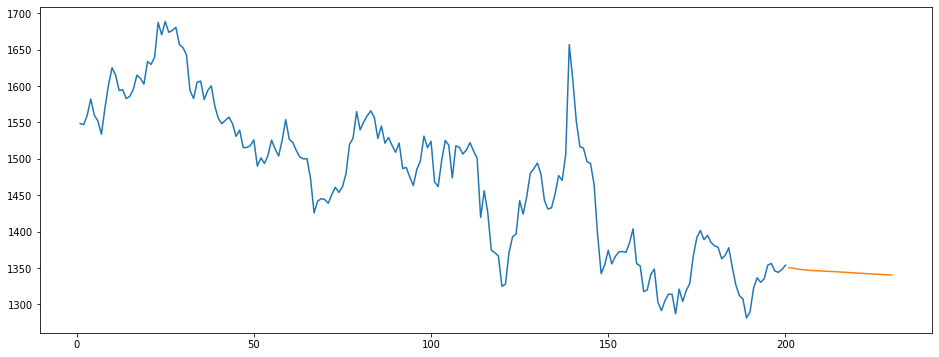

In [82]:
plt.figure(figsize=(16,6))
plt.plot(day_new,scaler.inverse_transform(df1[1479:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

In [83]:
scaler.inverse_transform(lst_output)

array([[1350.39757446],
       [1349.82230926],
       [1348.91304485],
       [1348.16537424],
       [1347.55005526],
       [1347.05772751],
       [1346.67119399],
       [1346.36389731],
       [1346.1073209 ],
       [1345.87497994],
       [1345.64721033],
       [1345.41015288],
       [1345.15705941],
       [1344.88589821],
       [1344.59870097],
       [1344.2996037 ],
       [1343.99317775],
       [1343.68442984],
       [1343.37727828],
       [1343.07440783],
       [1342.77770508],
       [1342.48775052],
       [1342.20432647],
       [1341.92648963],
       [1341.65358696],
       [1341.38394953],
       [1341.11699688],
       [1340.85171313],
       [1340.58737267],
       [1340.32354015]])

In [84]:
df = web.DataReader('HDFCBANK.NS', 'yahoo', start='2022-07-02', end='2022-07-08')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-04,1360.199951,1342.250000,1353.699951,1355.650024,4243740,1355.650024
2022-07-05,1379.349976,1348.300049,1364.000000,1352.599976,7162859,1352.599976
2022-07-06,1373.400024,1347.099976,1348.000000,1371.250000,7524539,1371.250000
2022-07-07,1398.000000,1374.449951,1380.000000,1395.800049,8871571,1395.800049
2022-07-08,1410.000000,1394.750000,1410.000000,1397.099976,6237015,1397.099976


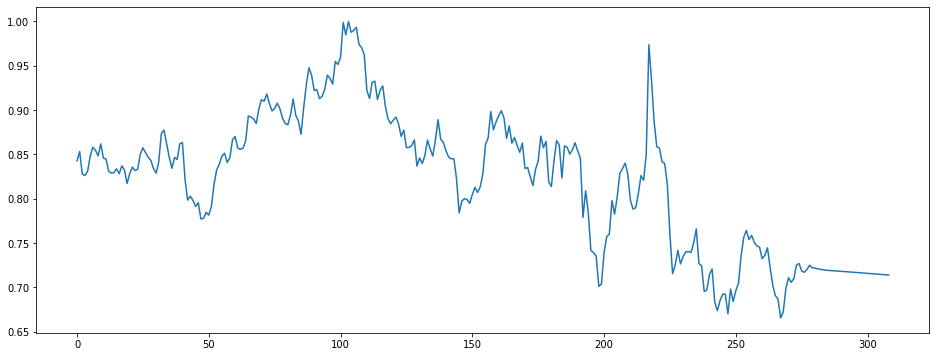

In [87]:
plt.figure(figsize=(16,6))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1400:])
plt.show()

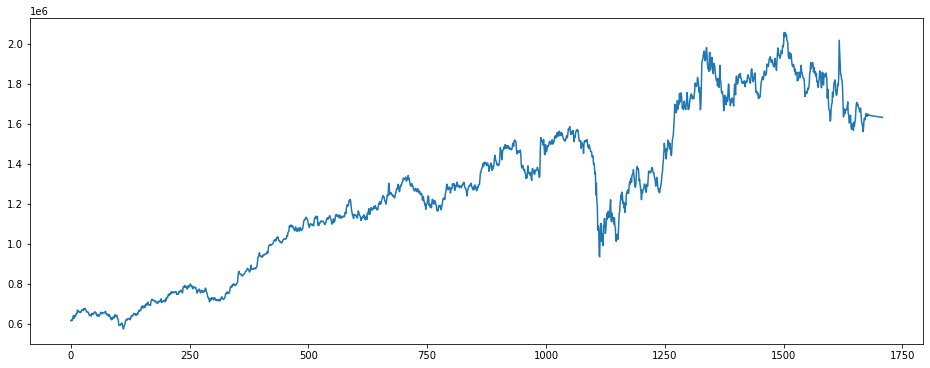

In [89]:
df3=scaler.inverse_transform(df3).tolist()
plt.figure(figsize=(16,6))
plt.plot(df3)
plt.show()